In [1]:
import pandas as pd
import numpy as np
#import copy

import specifics
import data

#import xgboost
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
import scipy.stats as st # For parameter generation

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
train_feature_dataset = pd.DataFrame.from_csv('dataset/traindata.csv')
train_outcome_dataset = pd.DataFrame.from_csv('dataset/status_group.csv')
test_feature_dataset = pd.DataFrame.from_csv('dataset/testdata.csv')

In [4]:
train_feature_dataset.shape

(59400, 39)

In [5]:
train_feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [6]:
train_feature_dataset.head(5).iloc[:,0:20]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management
id,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN


In [7]:
train_feature_dataset.head(5).iloc[:,20:40]

,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,
69572,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
data = specifics.build_data(train_feature_df = train_feature_dataset, 
                            train_outcome_df = train_outcome_dataset, 
                            test_feature_df = test_feature_dataset)

In [6]:
data.train_feature_df.shape

(59400, 795)

In [7]:
data.test_feature_df.shape

(14850, 795)

In [8]:
pd.set_option('display.max_rows', 3000)
list(data.train_feature_df.columns.values)[0:3000]

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'public_meeting',
 'permit',
 'construction_year',
 'created_day',
 'created_dow',
 'created_month',
 'created_year',
 'age',
 'funder_length',
 'installer_length',
 'scheme_name_length',
 'subvillage_name_length',
 'ward_length',
 'wpt_name_length',
 'funder_freq',
 'installer_freq',
 'scheme_name_freq',
 'subvillage_freq',
 'ward_freq',
 'wpt_name_freq',
 'basin__internal',
 'basin__lake_nyasa',
 'basin__lake_rukwa',
 'basin__lake_tanganyika',
 'basin__lake_victoria',
 'basin__pangani',
 'basin__rufiji',
 'basin__ruvuma_/_southern_coast',
 'basin__wami_/_ruvu',
 'region__arusha',
 'region__dar_es_salaam',
 'region__dodoma',
 'region__iringa',
 'region__kagera',
 'region__kigoma',
 'region__kilimanjaro',
 'region__lindi',
 'region__manyara',
 'region__mara',
 'region__mbeya',
 'region__morogoro',
 'region__mtwara',
 'region__mwanza',
 'region__pwani',
 'region__ru

In [9]:
assert sum(data.train_feature_df.index == data.train_outcome_df.index) == len(data.train_feature_df)

In [5]:
# This chunk is not used in later stage, because it is better to run CV on the whole dataset 
# (ie. do not split data, because we want the best parameters for the data size of our final 
# training dataset, not the best parameters for a smaller data size).

# X_train, X_test, y_train, y_test = train_test_split(data.train_feature_df, data.train_outcome_df, 
#                                                     test_size=0.15, random_state=42)

## Oversampling the minority class: 'functional needs repair' (Not used)

In [7]:
# Remember ['functional', 'functional needs repair', 'non functional'] is respectively [2, 1, 0]
y_train['status_group'].value_counts()

2    27418
0    19390
1     3682
Name: status_group, dtype: int64

In [6]:
from copy import deepcopy
train_minority_group_index = deepcopy(y_train[y_train.iloc[:,0] == 1])

In [7]:
train_minority_group_X_y_combined = X_train.join(train_minority_group_index, how='inner')

In [8]:
train_minority_group_X_y_combined.shape

(3682, 268)

In [9]:
length = train_minority_group_X_y_combined.shape[0]

In [10]:
train_minority_group_X_y_combined_combined = pd.concat([train_minority_group_X_y_combined,
                                                       #train_minority_group_X_y_combined,
                                                       train_minority_group_X_y_combined], ignore_index=True)
train_minority_group_X_y_combined_combined['index'] = list(range(100000, 100000 + length * 2))
train_minority_group_X_y_combined_combined.set_index('index', inplace = True)

In [11]:
train_minority_group_X_y_combined_combined.shape

(7364, 268)

In [12]:
X_train = X_train.append(train_minority_group_X_y_combined_combined.drop(['status_group'], axis = 1))
y_train = y_train.append(train_minority_group_X_y_combined_combined[['status_group']]) # [[]] to obtain df, not series

## Oversampling the minority class: 'functional needs repair' ENDS HERE

### XGBoost examples

https://dataplatform.ibm.com/analytics/notebooks/20c1c2d6-6a51-4bdc-9b2c-0e3f2bef7376/view?access_token=52b727bd6515bd687cfd88f929cc7869b0ea420e668b2730c6870e72e029f0d1

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://cambridgespark.com/content/tutorials/getting-started-with-xgboost/index.html

https://zz001.wordpress.com/2017/05/13/basics-of-xgboost-in-python/

http://danielhnyk.cz/how-to-use-xgboost-in-python/

### How to do with imbalanced data

min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.


From http://xgboost.readthedocs.io/en/latest/how_to/param_tuning.html

Handle Imbalanced Dataset

For common cases such as ads clickthrough log, the dataset is extremely imbalanced. This can affect the training of xgboost model, and there are two ways to improve it.

If you care only about the ranking order (AUC) of your prediction
1. Balance the positive and negative weights, via scale_pos_weight
2. Use AUC for evaluation

If you care about predicting the right probability
1. In such a case, you cannot re-balance the dataset
2. In such a case, set parameter max_delta_step to a finite number (say 1) will help convergence

### A test to show why having both XGBClassifier(n_jobs = -1) and RandomizedSearchCV(n_jobs = -1) is the fastest setting.

In [9]:
#import time
#start = time.time()

#params = {
#    "n_estimators": [6],
#    "learning_rate": st.uniform(0.060001, 0.0600003)
#}

#model = XGBClassifier(n_jobs = -1) # nthread deprecated

#gs = RandomizedSearchCV(model, params, n_jobs=1, n_iter=6)

#gs.fit(X_train, y_train.iloc[:,0]) 

#elapsed = time.time() - start
#print("Time spent: %f" % (elapsed))

Time spent: 111.958804


# Tuning process starts here

In [ ]:
# The difference between st.randint and st.uniform is just that the first one is an int and second is a float.

#one_to_left = st.beta(10, 1)  
#from_zero_positive = st.expon(0, 50)

params = {
    "n_estimators": [100],
    #"max_depth": st.randint(20, 40),
    "max_depth": st.randint(20, 40),
    "learning_rate": st.uniform(0.001, 0.25),
    #"colsample_bytree": one_to_left,
    "colsample_bytree": st.uniform(0.60, 0.40),
    #"subsample": one_to_left,
    "subsample": st.uniform(0.7, 0.3),
    "gamma": st.uniform(0.001, 1.2),
    "min_child_weight": [0,1,2,3,4,5],
    #"min_child_weight": from_zero_positive
    #"max_delta_step": st.randint(0, 5)
    "max_delta_step": [0, 1, 2, 3]
}

model = XGBClassifier(n_jobs = -1) # nthread deprecated

gs = RandomizedSearchCV(model, params, n_jobs=-1, n_iter=20)

#gs.fit(X_train, y_train.iloc[:,0]) 
gs.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

In [11]:
gs.grid_scores_

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80828, std: 0.00169, params: {'colsample_bytree': 0.92447771998253114, 'gamma': 0.64081556137854812, 'learning_rate': 0.2177378823995112, 'max_delta_step': 3, 'max_depth': 24, 'min_child_weight': 2, 'n_estimators': 30, 'subsample': 0.80788630426812924},
 mean: 0.80609, std: 0.00115, params: {'colsample_bytree': 0.86178245118887631, 'gamma': 1.3758032562899913, 'learning_rate': 0.39977748910258964, 'max_delta_step': 0, 'max_depth': 23, 'min_child_weight': 2, 'n_estimators': 30, 'subsample': 0.83705075511694016},
 mean: 0.81113, std: 0.00110, params: {'colsample_bytree': 0.68738506797933363, 'gamma': 0.85954878935980927, 'learning_rate': 0.085255945780874087, 'max_delta_step': 2, 'max_depth': 28, 'min_child_weight': 2, 'n_estimators': 30, 'subsample': 0.82149813575904063},
 mean: 0.77126, std: 0.00049, params: {'colsample_bytree': 0.68055254657806963, 'gamma': 1.3576367159259619, 'learning_rate': 0.32445913102762358, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'n

In [10]:
gs.best_params_

{'colsample_bytree': 0.68738506797933363,
 'gamma': 0.85954878935980927,
 'learning_rate': 0.085255945780874087,
 'max_delta_step': 2,
 'max_depth': 28,
 'min_child_weight': 2,
 'n_estimators': 30,
 'subsample': 0.82149813575904063}

In [14]:
best_model = XGBClassifier(
    colsample_bytree = 0.68738506797933363,
    gamma = 0.85954878935980927,
    learning_rate = 0.085255945780874087,
    max_depth = 28,
    n_estimators = 200,
    subsample = 0.82149813575904063,
    min_child_weight = 2,
    max_delta_step = 2,
    n_jobs = -1
)

In [15]:
best_model.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])
prediction = best_model.predict(data.test_feature_df)
result = pd.DataFrame(prediction).replace(to_replace = [2, 1, 0], 
                                          value = ['functional', 'functional needs repair', 'non functional'])
result.to_csv('result.csv', sep='\t', index = False)

### Code chunk to (after getting the best parameters from CV) get accuracy rate on test dataset. This chunk is not used in later stage, because it is better to run CV on the whole dataset (ie. do not split data, because we want the best parameters for the data size of our final training dataset, not the best parameters for a smaller data size).

In [ ]:
best_model = XGBClassifier(
    colsample_bytree = ,
    gamma = ,
    learning_rate = ,
    max_depth = ,
    n_estimators = ,
    subsample = ,
    min_child_weight = ,
    max_delta_step = ,
    n_jobs = -1
)

best_model.fit(X_train, y_train.iloc[:,0])

prediction = best_model.predict(X_test)
#pred_prob = best_model.predict_proba(X_test)

metrics.accuracy_score(y_test.iloc[:,0], prediction)

### Past Attempt: Considering max_delta_step and min_child_weight (min_child_weight would still be the default)

In [16]:
# Considering max_delta_step and min_child_weight (min_child_weight would still be the default)
gs.best_params_

{'colsample_bytree': 0.61191580388279143,
 'gamma': 1.4471141227193951,
 'learning_rate': 0.20586570183770209,
 'max_delta_step': 3,
 'max_depth': 27,
 'min_child_weight': 1,
 'n_estimators': 10,
 'subsample': 0.86484481943790181}

In [17]:
# Considering max_delta_step and min_child_weight 
gs.best_score_

0.80259457318280847

In [19]:
# Considering max_delta_step and min_child_weight 
best_model.fit(X_train, y_train.iloc[:,0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6119158038827914, gamma=1.447114122719395,
       learning_rate=0.2058657018377021, max_delta_step=3, max_depth=27,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8648448194379018)

In [20]:
# Considering max_delta_step and min_child_weight 
prediction = best_model.predict(X_test)
metrics.accuracy_score(y_test.iloc[:,0], prediction)

0.81459034792368124

### Past Attempt: Considering max_delta_step, not min_child_weight.

In [118]:
# Considering max_delta_step
gs.best_params_

{'colsample_bytree': 0.5088073970953898,
 'gamma': 2.3440737331595054,
 'learning_rate': 0.15135478088899137,
 'max_delta_step': 2,
 'max_depth': 31,
 'n_estimators': 10,
 'subsample': 0.96337604446426006}

In [119]:
# Best score, considering max_delta_step
gs.best_score_

0.80326797385620918

### Past Attempt: Considering neither max_delta_step, nor min_child_weight.

In [77]:
# Without considering max_delta_step
gs.best_params_

{'colsample_bytree': 0.90974442109854226,
 'gamma': 0.26863994012680026,
 'learning_rate': 0.35447682135869291,
 'max_depth': 30,
 'n_estimators': 10,
 'subsample': 0.82855724159824162}

In [78]:
# Best score, without considering max_delta_step
gs.best_score_

0.7987918399683106

### Final model importance check

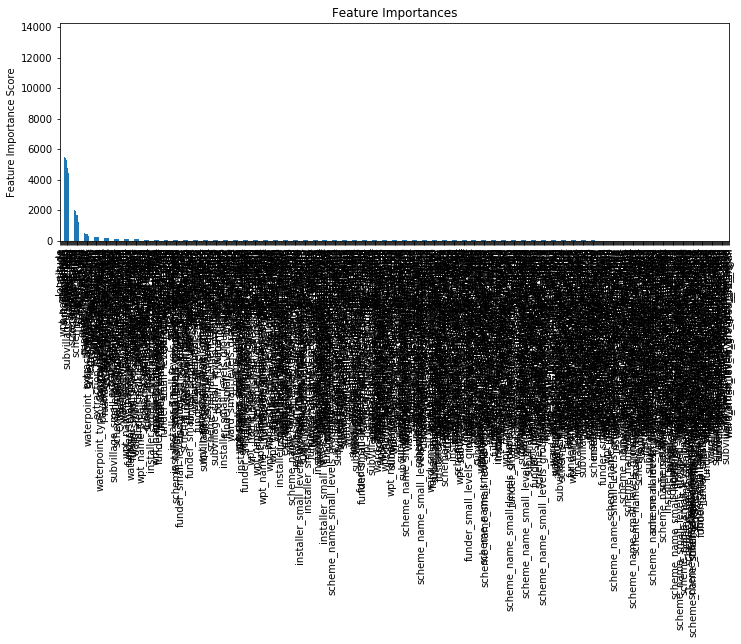

In [28]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(best_model._Booster.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [31]:
feat_imp.head(200)

longitude                                       13596
latitude                                        12584
gps_height                                       8140
wpt_name_length                                  7399
subvillage_freq                                  6798
population                                       5503
wpt_name_freq                                    5395
subvillage_name_length                           5260
ward_freq                                        4741
created_day                                      4429
created_dow                                      3096
funder_freq                                      2980
installer_freq                                   2615
scheme_name_freq                                 2533
construction_year                                2382
ward_length                                      2363
funder_length                                    2012
scheme_name_length                               1957
installer_length            

### To do list

Done: Differencing between record year(date) and construction year

Done: "payment" and "payment_type" are the same -- no need to do

Done: After dummify, transpose, drop_duplicates on categorical range, and transpose back.

Trim space

Move month to draw a line right before the rain season

Done: Set missing numeric values to zero?

Done: Remove any col filled with homogeneous or nearly homogeneous data.GeoData Consultants Ltd was the sole group in recorded_by and hence removed.

get_dummies(df_clean, drop_first = True)?

Set weird values in numerical columns to NaN.

scipy stat randint( ) <- make sure its meaning